In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [66]:
url = "https://en.wikipedia.org/wiki/List_of_most-subscribed_YouTube_channels"

# Read all tables from Wikipedia page
tables = pd.read_html(url)

# Print number of tables found
print(f"Total tables found: {len(tables)}")

# Select the correct table (check index by printing tables)
df = tables[0]  # Adjust index if needed

# Display first 10 rows
df.head(10)

Total tables found: 7


,Name,Link,Brand channel,Subscribers (millions),Primary language,Category,Country,Unnamed: 7
0,MrBeast,Link,No,371,English,Entertainment[20],United States,NaN
1,T-Series,Link,Yes,288,Hindi[21][22],Music,India,NaN
2,Cocomelon - Nursery Rhymes,Link,Yes,190,English,Education,United States,NaN
3,SET India,Link,Yes,182,Hindi[23],Entertainment,India,NaN
4,Vlad and Niki,Link,No,135,English,Entertainment,United States Russia,NaN
5,Kids Diana Show,Link,Yes,131,English[24],Entertainment,United States Ukraine,NaN
6,Like Nastya,Link,No,126,English,Entertainment,United States Russia,NaN
7,Stokes Twins,Link,No,116,English,Entertainment,United States,NaN
8,Zee Music Company,Link,Yes,115,Hindi[25][26],Music,India,NaN
9,PewDiePie,Link,No,110,English,Entertainment,Sweden Japan,NaN


In [67]:
df.shape

(51, 8)

In [68]:
df.drop(["Link", "Unnamed: 7"], axis=1, inplace=True)


In [69]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,371,English,Entertainment[20],United States
1,T-Series,Yes,288,Hindi[21][22],Music,India
2,Cocomelon - Nursery Rhymes,Yes,190,English,Education,United States
3,SET India,Yes,182,Hindi[23],Entertainment,India
4,Vlad and Niki,No,135,English,Entertainment,United States Russia


In [70]:
df = df.iloc[:-1]  # Removes the last row

In [71]:
df["Primary language"] = df["Primary language"].str.replace(r"\[\d+\]", "", regex=True)
df["Category"] = df["Category"].str.replace(r"\[\d+\]", "", regex=True)
df["Country"] = df["Country"].str.replace(r"\[\d+\]", "", regex=True)

C:\Users\Sanket\AppData\Local\Temp\ipykernel_18168\1744211726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Primary language"] = df["Primary language"].str.replace(r"\[\d+\]", "", regex=True)
C:\Users\Sanket\AppData\Local\Temp\ipykernel_18168\1744211726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Category"] = df["Category"].str.replace(r"\[\d+\]", "", regex=True)
C:\Users\Sanket\AppData\Local\Temp\ipykernel_18168\1744211726.py:3: SettingWithCopyWarning: 
A value is trying to be set on 

In [72]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,371,English,Entertainment,United States
1,T-Series,Yes,288,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,190,English,Education,United States
3,SET India,Yes,182,Hindi,Entertainment,India
4,Vlad and Niki,No,135,English,Entertainment,United States Russia


In [73]:
df['Category'] = df['Category'].str.split('/').str[0]


C:\Users\Sanket\AppData\Local\Temp\ipykernel_18168\1432498426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].str.split('/').str[0]


In [74]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,371,English,Entertainment,United States
1,T-Series,Yes,288,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,190,English,Education,United States
3,SET India,Yes,182,Hindi,Entertainment,India
4,Vlad and Niki,No,135,English,Entertainment,United States Russia


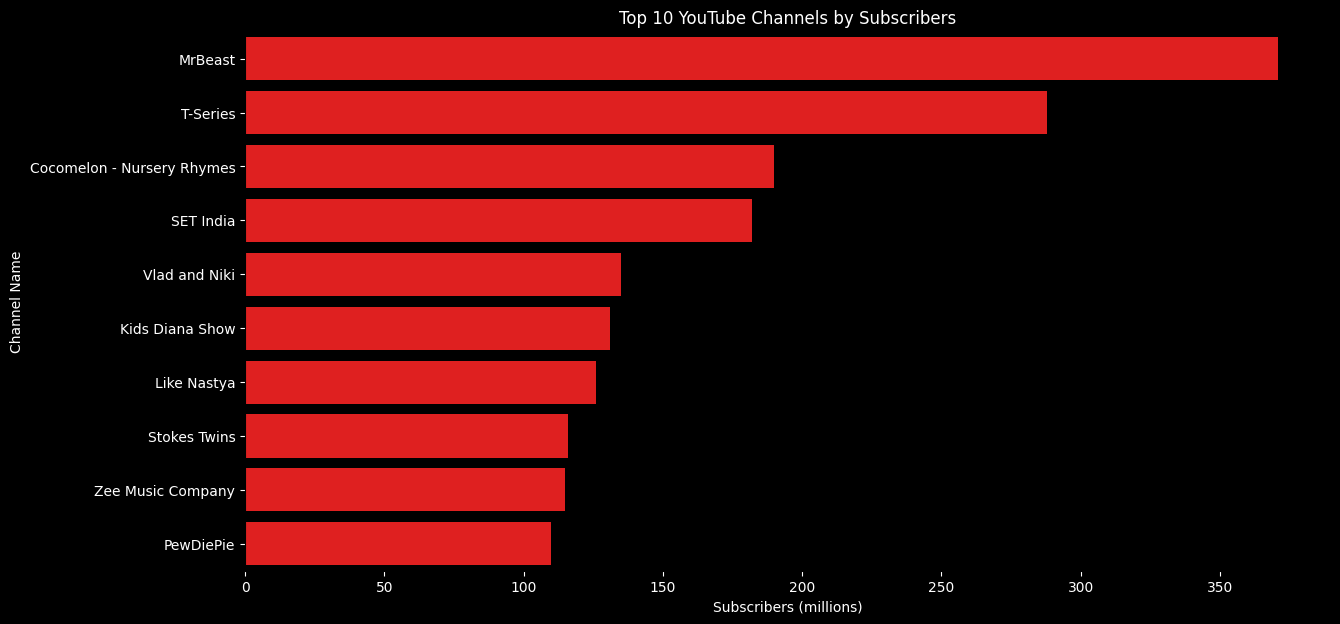

In [90]:
# Bar Plot of Top 10 YouTube Channels by Subscribers
top_10_df = df.nlargest(10, 'Subscribers (millions)')
plt.figure(figsize=(14, 7), facecolor='black')
ax = sns.barplot(x='Subscribers (millions)', y='Name', data=top_10_df.sort_values('Subscribers (millions)', ascending=False), color='red')
ax.set_facecolor('black')
ax.set_title('Top 10 YouTube Channels by Subscribers', color='white')
ax.set_xlabel('Subscribers (millions)', color='white')
ax.set_ylabel('Channel Name', color='white')
ax.tick_params(colors='white')
plt.show()


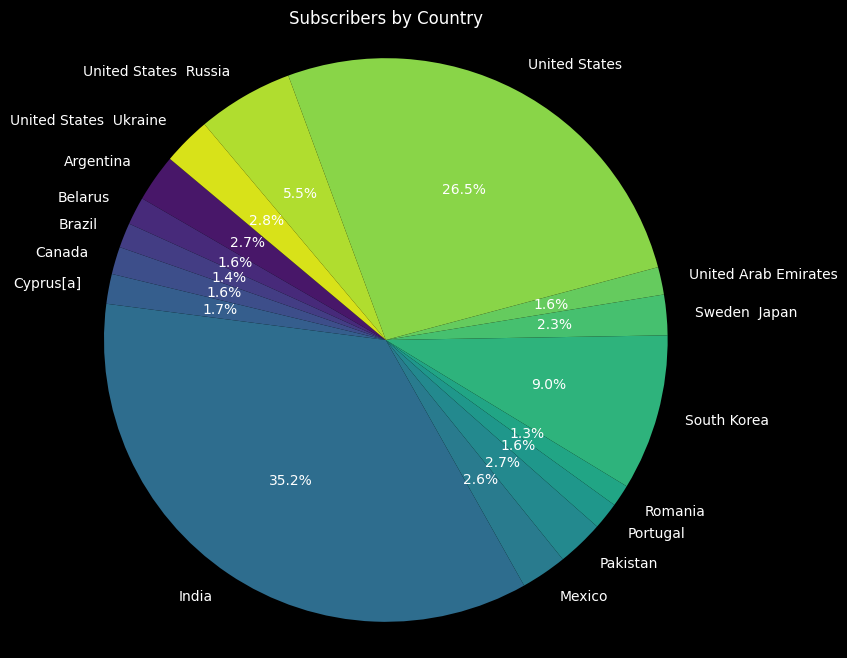

In [105]:
# Calculate total subscribers by country
country_subscribers = df.groupby('Country')['Subscribers (millions)'].sum()

# Create a pie chart using seaborn
plt.figure(figsize=(8, 8), facecolor='black')
colors = sns.color_palette('viridis', len(country_subscribers))
plt.pie(country_subscribers, labels=country_subscribers.index, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'white'})
plt.gca().set_facecolor('black')
plt.title('Subscribers by Country', color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\Sanket\AppData\Local\Temp\ipykernel_18168\1138362346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Category', data=df.sort_values('Category', ascending=False), palette='viridis', order=df['Category'].value_counts().index)


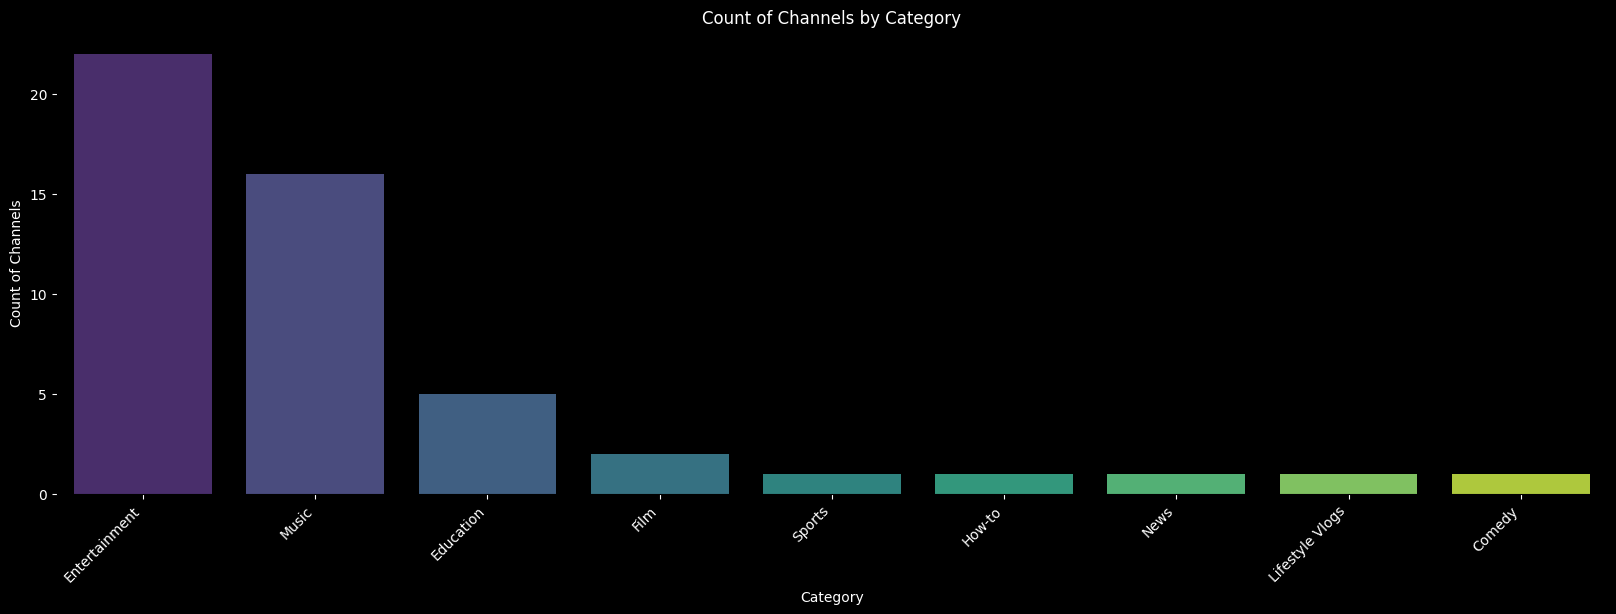

In [107]:
# Count of Channels by Category
plt.figure(figsize=(20, 6), facecolor='black')
ax = sns.countplot(x='Category', data=df.sort_values('Category', ascending=False), palette='viridis', order=df['Category'].value_counts().index)
ax.set_facecolor('black')
ax.set_title('Count of Channels by Category', color='white')
ax.set_xlabel('Category', color='white')
ax.set_ylabel('Count of Channels', color='white')
ax.tick_params(colors='white')
plt.xticks(rotation=45, ha='right')
plt.show()